<a href="https://colab.research.google.com/github/sp1667/Suryaprakashchary_INFO5502_SPRING2022/blob/main/lab_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The seventh Lab-assignment (03/31/2022, 50 points in total)

The purpose of this exercise is to build several regression models based on real-world datasets. 

### Question 1 (25 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

In [1]:
### You code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np








In [32]:
pip install keras

In [33]:
pip install tensorflow

     |████████████████████████████████| 462 kB 7.9 MB/s 


Root Mean Square Error score is 75.9549436001661
R2 Score is 0.9783453724222465


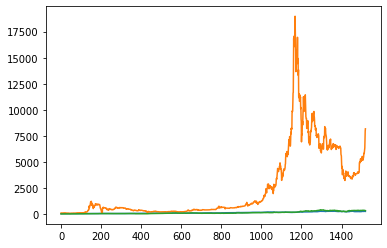

In [34]:
data=pd.read_csv('/content/mydata.csv')

abc = data.drop(['Date', 'AMZN'], axis = 1)
ef = data['AMZN']
plt.plot(abc)
abctrain,abctest,eftrain,eftest = train_test_split(abc, ef, test_size = 0.35, random_state = 0)

logireg = LinearRegression()
logireg.fit(abctrain, eftrain)

efpred = logireg.predict(abctest)
print("Root Mean Square Error score is",np.sqrt(mean_squared_error(eftest, efpred)))
print("R2 Score is", r2_score(eftest, efpred))

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [36]:
# Building the Sequence to sequence mdl
mdl = Sequential()
mdl.add(LSTM(50, return_sequences=True, input_shape= (abctrain.shape[1], 1)))
mdl.add(LSTM(50, return_sequences=False))
mdl.add(Dense(50))
mdl.add(Dense(1))

# Compiling the model
mdl.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
mdl.fit(abctrain, eftrain, batch_size=1, epochs=25)

Epoch 1/25
988/988 [==============================] - 7s 4ms/step - loss: 374668.7812
Epoch 2/25
988/988 [==============================] - 4s 4ms/step - loss: 19268.7129
Epoch 3/25
988/988 [==============================] - 3s 4ms/step - loss: 8210.6250
Epoch 4/25
988/988 [==============================] - 4s 4ms/step - loss: 8006.1104
Epoch 5/25
988/988 [==============================] - 4s 4ms/step - loss: 6474.2495
Epoch 6/25
988/988 [==============================] - 4s 4ms/step - loss: 6779.1509
Epoch 7/25
988/988 [==============================] - 4s 4ms/step - loss: 6986.8467
Epoch 8/25
988/988 [==============================] - 4s 4ms/step - loss: 6794.3320
Epoch 9/25
988/988 [==============================] - 4s 4ms/step - loss: 6716.4971
Epoch 10/25
988/988 [==============================] - 4s 4ms/step - loss: 7646.4902
Epoch 11/25
988/988 [==============================] - 4s 4ms/step - loss: 6347.5093
Epoch 12/25
988/988 [==============================] - 4s 4ms/step - lo

### Question 2 (25 points) The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset. The dataset can be downloaded here: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/Twitter%20Sentiment%20Analysis. Please build a logistic regression model for the classification, evaluation metrics include accuracy, precision, recall, and F-1 score need to be reported. 

In [21]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [22]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
train_data.head()
bb = train_data.append(test_data, ignore_index = True)
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


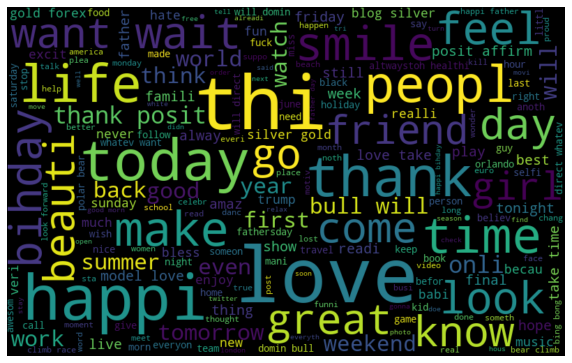

In [23]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt
bb['tidy_tweet'] = np.vectorize(remove_pattern)(bb['tweet'], '@[\w]*')
bb['tidy_tweet'] = bb['tidy_tweet'].str.replace('[^a-zA-Z#]+',' ')
bb['tidy_tweet'] = bb['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
token_tweet = bb['tidy_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import *
stemmer = PorterStemmer()
token_tweet = token_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(token_tweet)):
    token_tweet[i] = ' '.join(token_tweet[i])
bb['tidy_tweet']  = token_tweet
all_words = ' '.join([text for text in bb['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

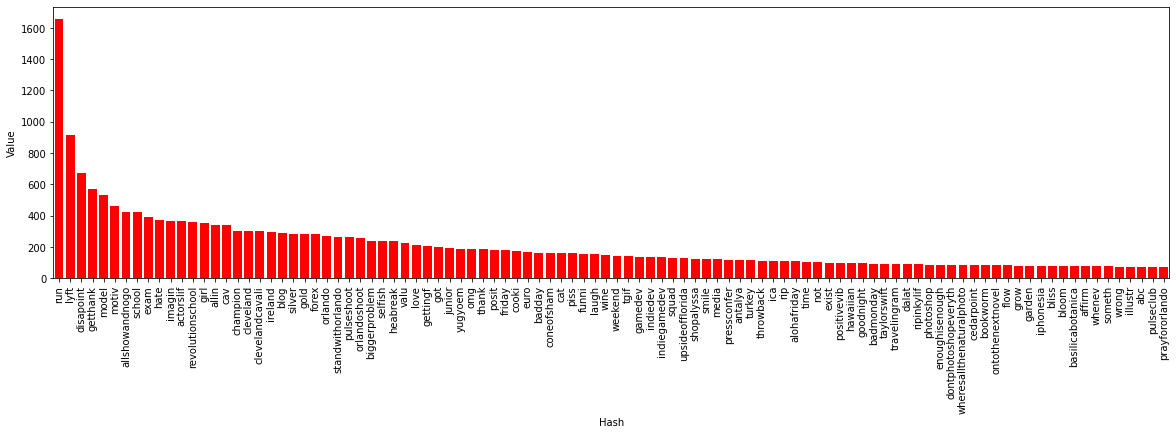

In [27]:
def hashtag_extract(b):
    hashtags = []
    for i in b:
        hashes = re.findall(r'#(\w+)', i)
        hashtags.append(hashes)
    return hashtags
#extracting labels
HT_regular = hashtag_extract(bb['tidy_tweet'][bb['label'] == 0])
HT_negative = hashtag_extract(bb['tidy_tweet'][bb['label'] == 1])
#counting sum
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

fd = nltk.FreqDist(HT_regular)
df = pd.DataFrame({'Hash': list(fd.keys()),
                  'Value' : list(fd.values())})
df = df.nlargest(columns = 'Value', n = 100)
plt.figure(figsize = (20,5))
plot1 = sns.barplot(data =df, x = 'Hash', y = 'Value',facecolor="Red")
plot1.set_xticklabels(list(fd.keys()), rotation=90)
plt.show()

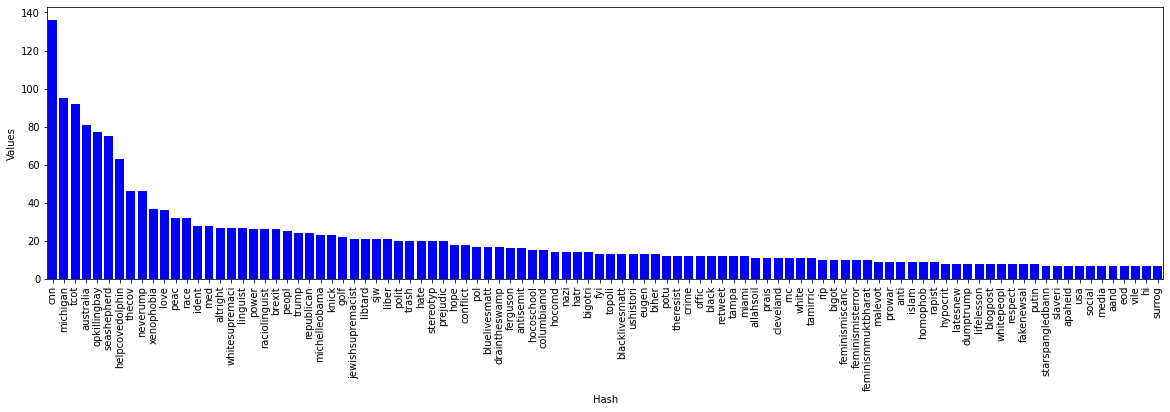

In [28]:
#Racist Tweet

fd1 = nltk.FreqDist(HT_negative)
df2 = pd.DataFrame({'Hash': list(fd1.keys()),
                  'Values' : list(fd1.values())})

df2 = df2.nlargest(columns = 'Values', n = 100)

plt.figure(figsize = (20,5))
plot2 = sns.barplot(data =df2, x = 'Hash', y = 'Values',facecolor="Blue")
plot2.set_xticklabels(list(fd1.keys()), rotation=90)
plt.show()

In [26]:
cvectorizer = CountVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
bow = cvectorizer.fit_transform(bb['tidy_tweet'])
len(cvectorizer.get_feature_names())
tvectorizer = TfidfVectorizer(max_df=0.99, min_df=6, max_features=1000, stop_words='english')
tfidf = tvectorizer.fit_transform(bb['tidy_tweet'])
train_data.shape
tr_bow = bow[:31962,:]
tst_bow = bow[31962:,:]
xtr_bow, xvalid_bow, ytr, yvalid = train_test_split(tr_bow, train_data['label'], test_size = 0.5)
logreg = LogisticRegression()
logreg.fit(xtr_bow, ytr)
pred = logreg.predict_proba(xvalid_bow)
pred_int = pred[:,1] >= 0.5
pred_int = pred_int.astype(np.int)
f1_score(yvalid, pred_int)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.49718925671455344